# Farfetch Data EDA

## Agenda:
    - Bibliotheken & Einstellungen
    - Überblick über Datensatz
    - Deskriptive Analyse

## Bibliotheken & Einstellungen

In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import requests
from io import BytesIO

pd.set_option('display.max_columns', 30)

plt.style.use('dark_background')

## Überblick über Datensatz

In [3]:
df = pd.read_csv('data_farfetch_plp_usa_e0001_20230623.txt', sep=';', header=None)

columns = ['Website_name','Competence_date', 'Country_code','Currency_Code',
           'Brand','Category_1', 'Category_2','Category_3', 'Product_code',
           'Product_title', 'URL', 'image_URL','Full_price_USD','Discounted_price_USD',
           'Full_price_EUR','Discounted_price_EUR','Flag']
df.columns = columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588826 entries, 0 to 588825
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Website_name          588826 non-null  object 
 1   Competence_date       588826 non-null  object 
 2   Country_code          588826 non-null  object 
 3   Currency_Code         588826 non-null  object 
 4   Brand                 588826 non-null  object 
 5   Category_1            588826 non-null  object 
 6   Category_2            588826 non-null  object 
 7   Category_3            365920 non-null  object 
 8   Product_code          588826 non-null  int64  
 9   Product_title         588826 non-null  object 
 10  URL                   588826 non-null  object 
 11  image_URL             588826 non-null  object 
 12  Full_price_USD        588826 non-null  float64
 13  Discounted_price_USD  588826 non-null  float64
 14  Full_price_EUR        588826 non-null  float64
 15  

In [5]:
df.describe()

,Product_code,Full_price_USD,Discounted_price_USD,Full_price_EUR,Discounted_price_EUR,Flag
count,5.888260e+05,5.888260e+05,5.888260e+05,5.888260e+05,5.888260e+05,588826.000000
mean,1.859878e+07,9.077251e+02,7.913926e+02,8.350687e+02,7.280470e+02,0.517718
std,1.627126e+06,5.027802e+03,4.996758e+03,4.625393e+03,4.596834e+03,0.499686
min,1.004756e+07,7.000000e+00,7.000000e+00,6.430000e+00,6.430000e+00,0.000000
25%,1.795725e+07,2.000000e+02,1.620000e+02,1.839900e+02,1.490300e+02,0.000000
50%,1.910720e+07,3.950000e+02,3.180000e+02,3.633800e+02,2.925400e+02,1.000000
75%,1.974472e+07,7.980000e+02,6.360000e+02,7.341300e+02,5.850900e+02,1.000000
max,2.073906e+07,1.530275e+06,1.530275e+06,1.407797e+06,1.407797e+06,1.000000


In [6]:
df.isna().sum()

Website_name                 0
Competence_date              0
Country_code                 0
Currency_Code                0
Brand                        0
Category_1                   0
Category_2                   0
Category_3              222906
Product_code                 0
Product_title                0
URL                          0
image_URL                    0
Full_price_USD               0
Discounted_price_USD         0
Full_price_EUR               0
Discounted_price_EUR         0
Flag                         0
dtype: int64

## Deskriptive Analyse und Visualisierungen

In [7]:
def NotUnique(df:pd.DataFrame) ->list[str]:
    cols = []
    for column in df.columns:
        if df[column].nunique() > 1:
            cols.append(column)
    return cols

In [8]:
cols = NotUnique(df)

In [9]:
cols

['Brand',
 'Category_1',
 'Category_2',
 'Category_3',
 'Product_code',
 'Product_title',
 'URL',
 'image_URL',
 'Full_price_USD',
 'Discounted_price_USD',
 'Full_price_EUR',
 'Discounted_price_EUR',
 'Flag']

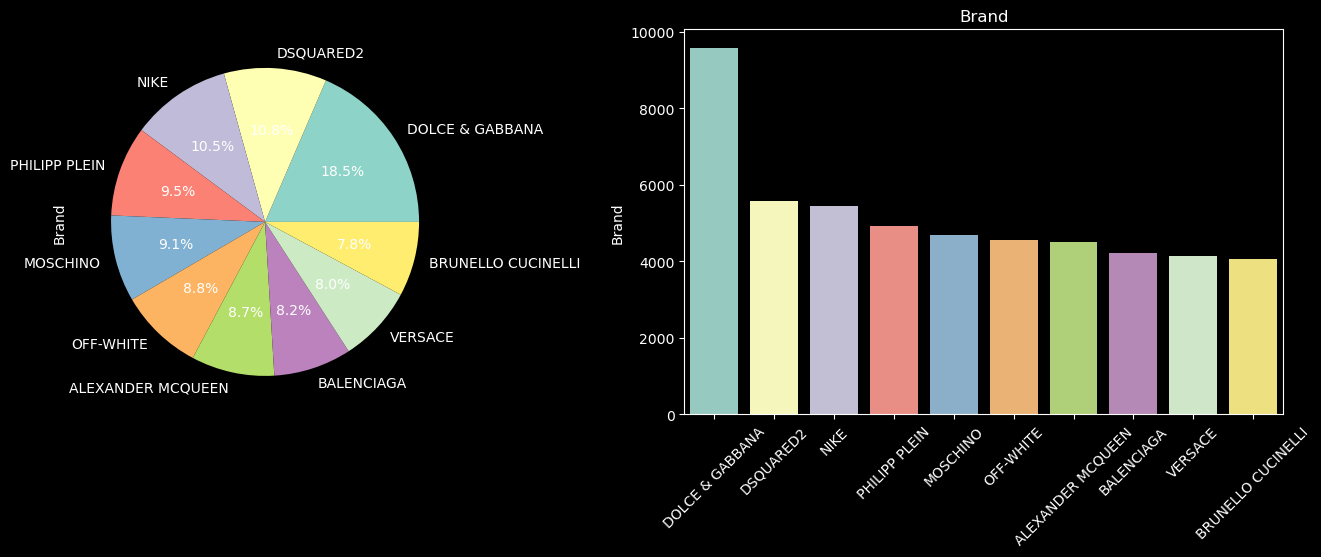

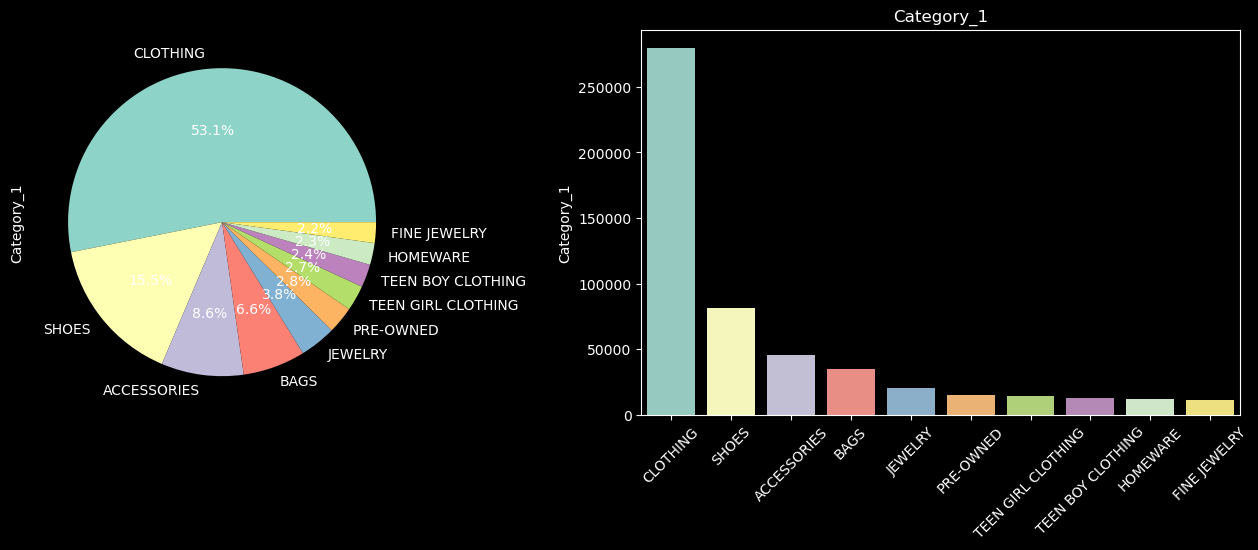

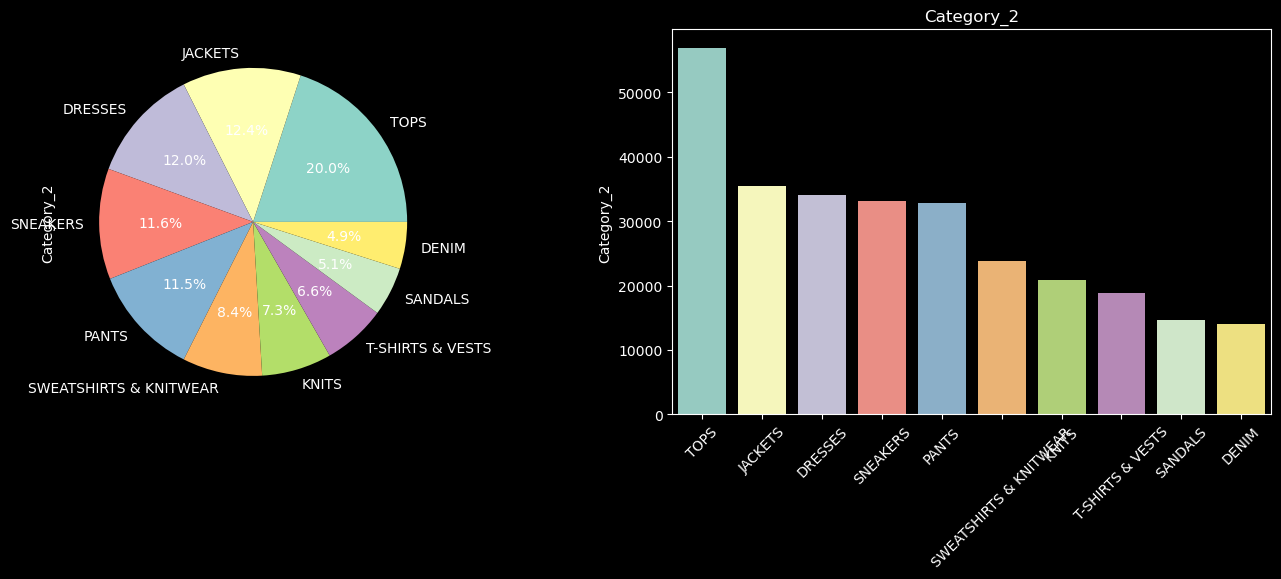

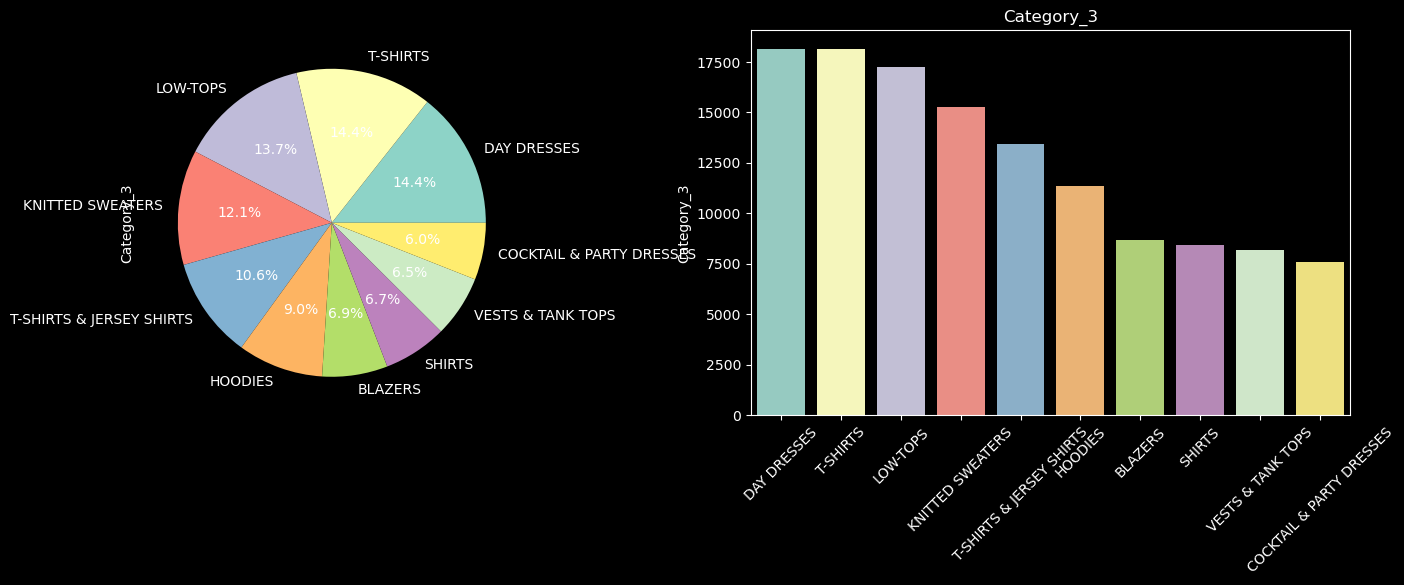

In [15]:
for col in ['Brand','Category_1','Category_2','Category_3']:
    value = df[col].value_counts()[:10]
    fig, ax = plt.subplots(1,2, figsize=(17,5))
    sns.barplot(y=value, x=value.index)
    value.plot(kind='pie', autopct=lambda v: f'{v:.1f}%', ax=ax[0])
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

In [46]:
df['Discount_%'] = ((df['Full_price_EUR'] - df['Discounted_price_EUR'])/df['Full_price_EUR']).round(2)
df['Discount_EUR'] = df['Full_price_EUR'] - df['Discounted_price_EUR']

In [47]:
df['Discount_%'].describe()

count    588826.000000
mean          0.167287
std           0.195175
min           0.000000
25%           0.000000
50%           0.050000
75%           0.300000
max           0.860000
Name: Discount_%, dtype: float64

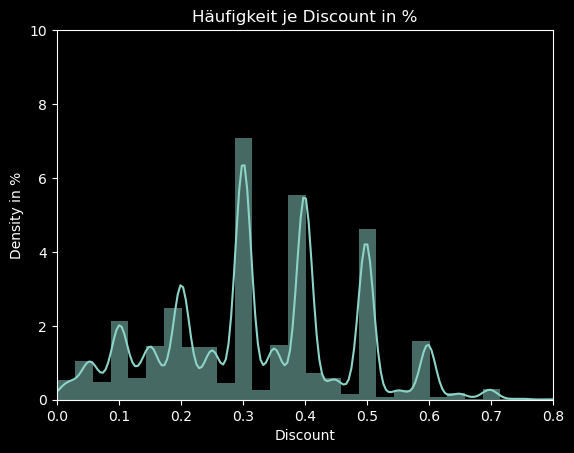

In [45]:
sns.histplot(df['Discount_%'].loc[df['Discount_%'] > 0], bins=30, kde=True, stat="density", linewidth=0)
plt.title('Häufigkeit je Discount in %')
plt.ylabel('Density in %')
plt.xlabel('Discount')
plt.xlim(0.0, 0.8)
plt.ylim(0, 10)

plt.show()

In [51]:
df.loc[df['Discount_%'] == df['Discount_%'].max()]

,Website_name,Competence_date,Country_code,Currency_Code,Brand,Category_1,Category_2,Category_3,Product_code,Product_title,URL,image_URL,Full_price_USD,Discounted_price_USD,Full_price_EUR,Discounted_price_EUR,Flag,Discount_%,Discount_EUR
276402,Farfetch,2023-06-23,USA,USD,MAISON MARGIELA,CLOTHING,TOPS,T-SHIRTS & JERSEY SHIRTS,16034865,box pattern sheer T-shirt,http://www.farfetch.com/shopping/women/maison-...,https://cdn-images.farfetch-contents.com/16/03...,1719.0,244.0,1581.41,224.47,1,0.86,1356.94


In [60]:
df.sort_values(by='Discount_%',ascending=False).head(6)

,Website_name,Competence_date,Country_code,Currency_Code,Brand,Category_1,Category_2,Category_3,Product_code,Product_title,URL,image_URL,Full_price_USD,Discounted_price_USD,Full_price_EUR,Discounted_price_EUR,Flag,Discount_%,Discount_EUR
276402,Farfetch,2023-06-23,USA,USD,MAISON MARGIELA,CLOTHING,TOPS,T-SHIRTS & JERSEY SHIRTS,16034865,box pattern sheer T-shirt,http://www.farfetch.com/shopping/women/maison-...,https://cdn-images.farfetch-contents.com/16/03...,1719.0,244.0,1581.41,224.47,1,0.86,1356.94
539930,Farfetch,2023-06-23,USA,USD,RICHARD QUINN,CLOTHING,DENIM,STRAIGHT-LEG JEANS,17627170,Daisy logo straight-leg jeans,http://www.farfetch.com/shopping/women/richard...,https://cdn-images.farfetch-contents.com/17/62...,1165.0,191.0,1071.75,175.71,1,0.84,896.04
172728,Farfetch,2023-06-23,USA,USD,DSQUARED2,CLOTHING,KNITS,KNITTED SWEATERS,13963446,check detail sweatshirt,http://www.farfetch.com/shopping/women/dsquare...,https://cdn-images.farfetch-contents.com/13/96...,1270.0,209.0,1168.35,192.27,1,0.84,976.08
206083,Farfetch,2023-06-23,USA,USD,PETER DO,CLOTHING,DENIM,STRAIGHT-LEG JEANS,16606616,Combo high-rise straight jeans,http://www.farfetch.com/shopping/women/peter-d...,https://cdn-images.farfetch-contents.com/16/60...,1651.0,274.0,1518.85,252.06,1,0.83,1266.79
123289,Farfetch,2023-06-23,USA,USD,RICK OWENS,CLOTHING,KNITS,KNITTED SWEATERS,16338996,open-knit jumper,http://www.farfetch.com/shopping/women/rick-ow...,https://cdn-images.farfetch-contents.com/16/33...,2122.0,351.0,1952.16,322.90,1,0.83,1629.26
387562,Farfetch,2023-06-23,USA,USD,COMME DES GARÇONS HOMME PLUS,CLOTHING,PANTS,TAILORED PANTS,16774839,frayed-trim tailored trousers,http://www.farfetch.com/shopping/men/comme-des...,https://cdn-images.farfetch-contents.com/16/77...,1737.0,293.0,1597.97,269.54,1,0.83,1328.43


In [79]:
def ShowProducts(df:pd.DataFrame, column:str,count:int):
    label_width = 22

    df_new = df[['Brand','Category_2','Product_title','image_URL','Full_price_EUR','Discounted_price_EUR','Discount_%','Discount_EUR']]
    df_new = df_new.sort_values(by=column, ascending=False).reset_index(drop=True)

    for i in range(count):
        response = requests.get(df_new['image_URL'][i])
        image = Image.open(BytesIO(response.content))

        plt.imshow(image)
        plt.axis('off')
        plt.show()

        print(f'{"Brand:":<{label_width}}{df_new["Brand"][i]}')
        print(f'{"Category:":<{label_width}}{df_new["Category_2"][i]}')
        print(f'{"Product title:":<{label_width}}{df_new["Product_title"][i]}')
        print(f'{"Full price EUR:":<{label_width}}{df_new["Full_price_EUR"][i]}')
        print(f'{"Discounted price EUR:":<{label_width}}{df_new["Discounted_price_EUR"][i]}')

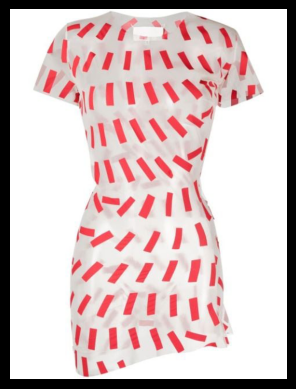

Brand:                MAISON MARGIELA
Category:             TOPS
Product title:        box pattern sheer T-shirt
Full price EUR:       1581.41
Discounted price EUR: 224.47


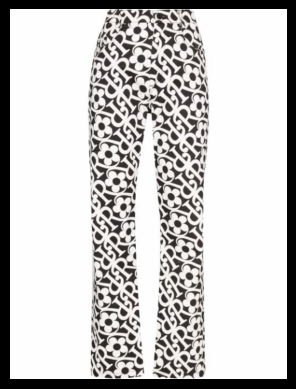

Brand:                RICHARD QUINN
Category:             DENIM
Product title:        Daisy logo straight-leg jeans
Full price EUR:       1071.75
Discounted price EUR: 175.71


In [78]:
ShowProducts(df=df,column='Discount_%',count=2)

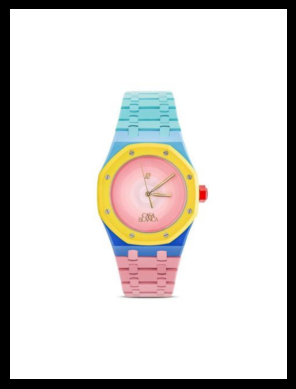

Brand:                MAD PARIS
Category:             FINE WATCHES
Product title:        customised Audemars Piguet Royal Oak 39mm
Full price EUR:       114995.4
Discounted price EUR: 57523.45


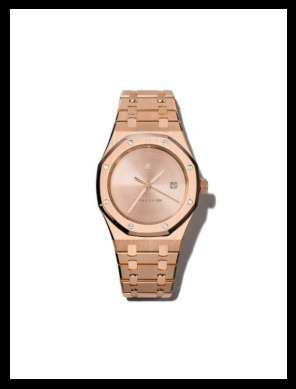

Brand:                MAD PARIS
Category:             FINE WATCHES
Product title:        x 1017 ALYX 9SM pre-owned customised Royal Oak 41mm
Full price EUR:       137994.48
Discounted price EUR: 96611.77


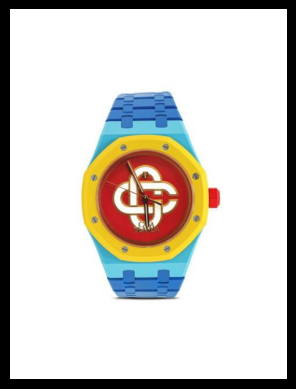

Brand:                MAD PARIS
Category:             FINE WATCHES
Product title:        customised Casablanca x MAD Paris Royal Oak 37mm
Full price EUR:       114995.4
Discounted price EUR: 80512.41


In [80]:
ShowProducts(df=df,column='Discount_EUR',count=3)

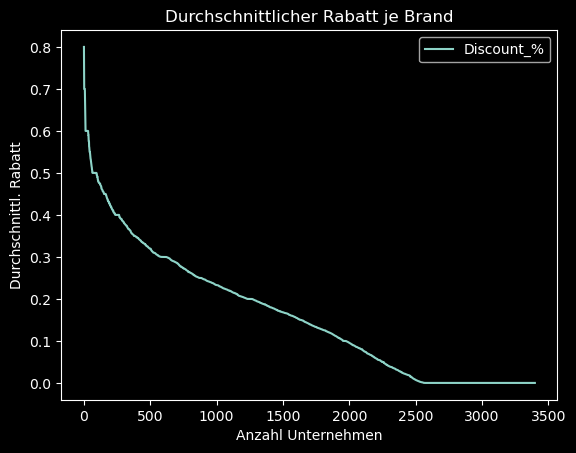

In [94]:
df.groupby(df['Brand']).agg({'Discount_%':'mean'}).sort_values(by='Discount_%', ascending=False).reset_index().plot(kind='line')
plt.title('Durchschnittlicher Rabatt je Brand')
plt.ylabel('Durchschnittl. Rabatt')
plt.xlabel('Anzahl Unternehmen')
plt.show()

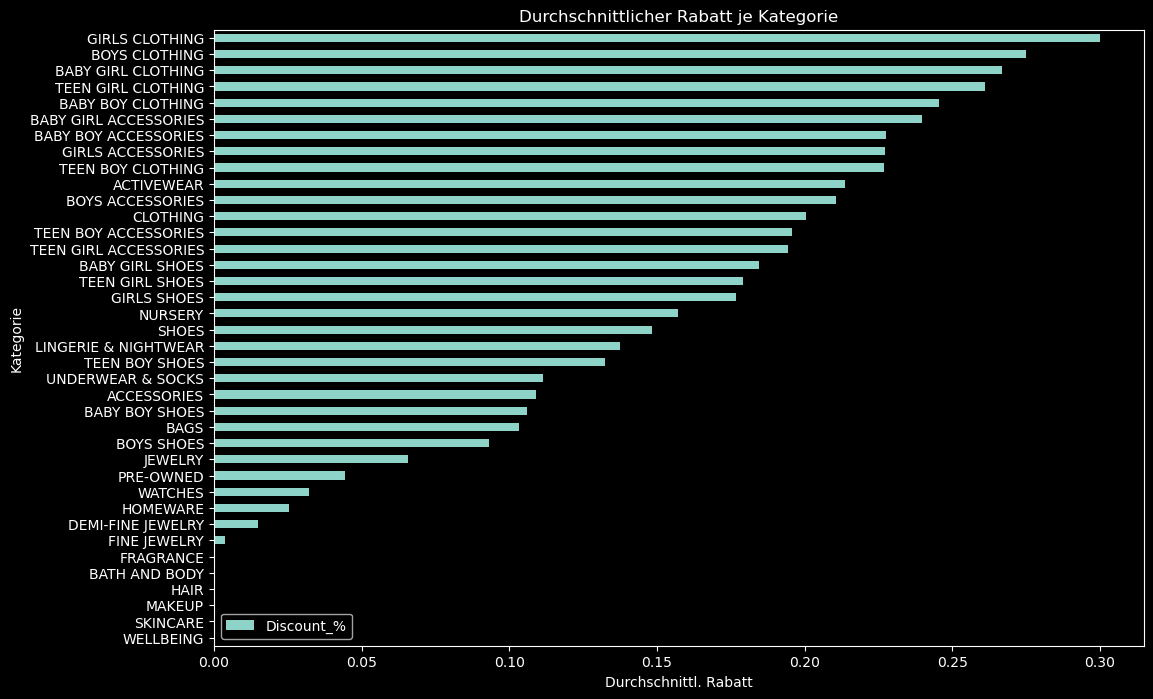

In [101]:
df.groupby(df['Category_1']).agg({'Discount_%':'mean'}).sort_values(by='Discount_%', ascending=True).plot(kind='barh', figsize=(12,8))
plt.title('Durchschnittlicher Rabatt je Kategorie')
plt.ylabel('Kategorie')
plt.xlabel('Durchschnittl. Rabatt')
plt.show()

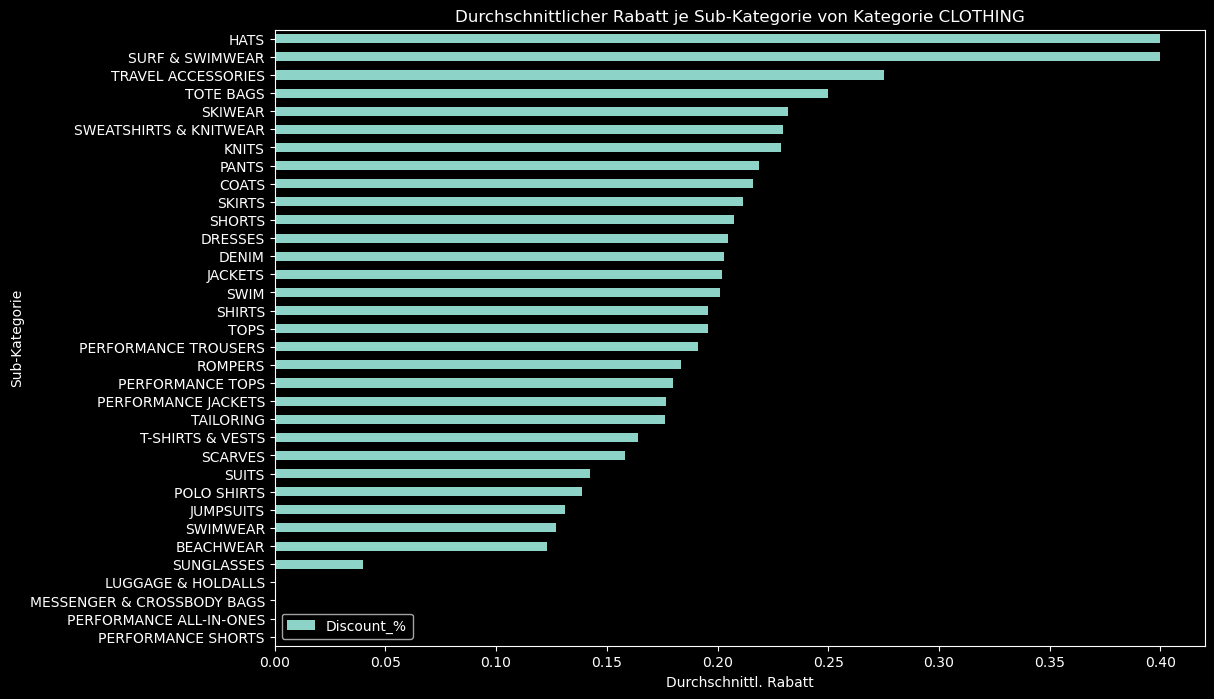

In [104]:
df.loc[df['Category_1']=='CLOTHING'].groupby(df['Category_2']).agg({'Discount_%':'mean'}).sort_values(by='Discount_%', ascending=True).plot(kind='barh', figsize=(12,8))
plt.title('Durchschnittlicher Rabatt je Sub-Kategorie von Kategorie CLOTHING')
plt.ylabel('Sub-Kategorie')
plt.xlabel('Durchschnittl. Rabatt')
plt.show()

In [135]:
df_sample = df.loc[(df['Discount_%'] != 0)&(df['Full_price_EUR']<2000)].sample(30000)

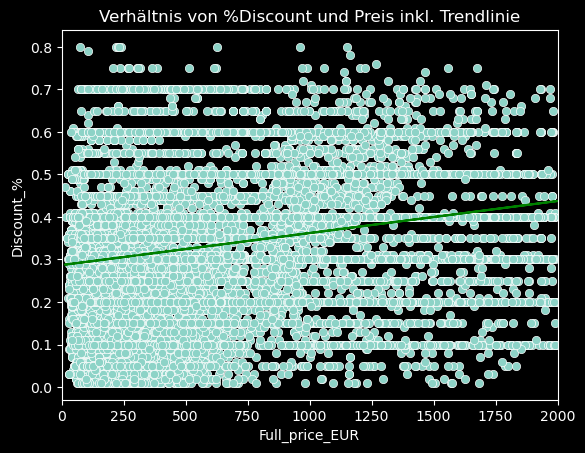

<Figure size 1200x600 with 0 Axes>

In [141]:
sns.scatterplot(x=df_sample['Full_price_EUR'], y=df_sample['Discount_%'])

m, b = np.polyfit(df_sample['Full_price_EUR'], df_sample['Discount_%'], 1)
plt.plot(df_sample['Full_price_EUR'], m*df_sample['Full_price_EUR'] + b, color='green')

plt.title('Verhältnis von %Discount und Preis inkl. Trendlinie')
plt.xlim(0,2000)
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.show()

In [145]:
df_popular = pd.DataFrame()
for column in ['Brand','Category_1','Category_2','Category_3']:
    df_popular[column] = df[column].value_counts().index[:10]

In [146]:
df_popular

,Brand,Category_1,Category_2,Category_3
0,DOLCE & GABBANA,CLOTHING,TOPS,DAY DRESSES
1,DSQUARED2,SHOES,JACKETS,T-SHIRTS
2,NIKE,ACCESSORIES,DRESSES,LOW-TOPS
3,PHILIPP PLEIN,BAGS,SNEAKERS,KNITTED SWEATERS
4,MOSCHINO,JEWELRY,PANTS,T-SHIRTS & JERSEY SHIRTS
5,OFF-WHITE,PRE-OWNED,SWEATSHIRTS & KNITWEAR,HOODIES
6,ALEXANDER MCQUEEN,TEEN GIRL CLOTHING,KNITS,BLAZERS
7,BALENCIAGA,TEEN BOY CLOTHING,T-SHIRTS & VESTS,SHIRTS
8,VERSACE,HOMEWARE,SANDALS,VESTS & TANK TOPS
9,BRUNELLO CUCINELLI,FINE JEWELRY,DENIM,COCKTAIL & PARTY DRESSES


In [153]:
popular_list = df_popular['Brand'].to_list()

In [160]:
df.loc[df['Brand'].isin(popular_list)].groupby('Brand').agg({'Full_price_EUR':'mean',
                                                             'Discounted_price_EUR':'mean',
                                                             'Discount_%':'mean',
                                                             'Discount_EUR':'mean'}).sort_values(by='Full_price_EUR', ascending=False).round(2)

,Full_price_EUR,Discounted_price_EUR,Discount_%,Discount_EUR
Brand,,,,
BRUNELLO CUCINELLI,1971.52,1551.15,0.22,420.37
DOLCE & GABBANA,1444.55,1260.46,0.15,184.09
PHILIPP PLEIN,1351.02,957.25,0.28,393.76
BALENCIAGA,1254.49,1148.07,0.09,106.41
ALEXANDER MCQUEEN,1125.00,1008.79,0.10,116.21
VERSACE,990.66,735.33,0.20,255.34
OFF-WHITE,864.14,568.76,0.32,295.38
DSQUARED2,653.42,437.65,0.30,215.77
MOSCHINO,602.37,412.68,0.29,189.68


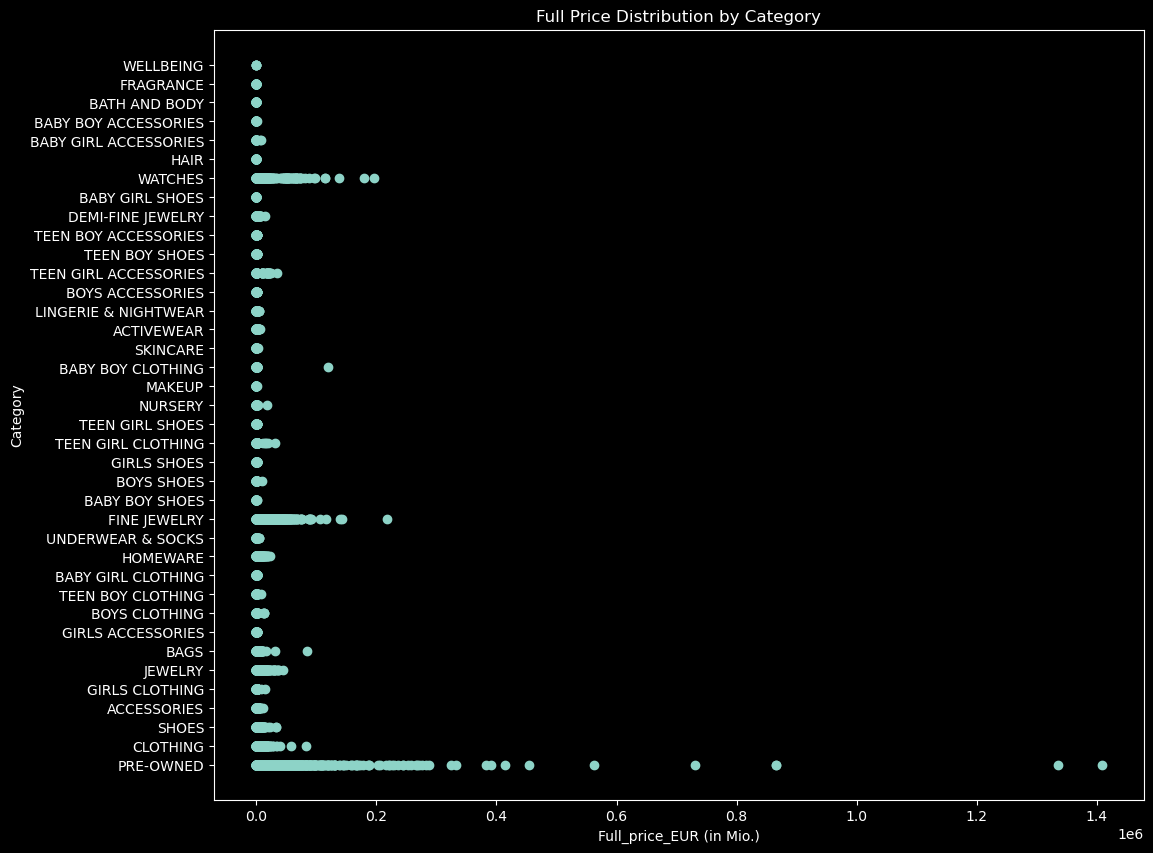

In [149]:
plt.scatter(df['Full_price_EUR'],df['Category_1'])
plt.figure(figsize=(12,10))
plt.xlabel('Full_price_EUR (in Mio.)')
plt.ylabel('Category')
plt.title('Full Price Distribution by Category')
plt.show()